## 전체 구조
- 신경망과 같이 레고 블록처럼 계층을 조합하여 만들 수 있음.
- 합성곱 계층과 풀링 계층이 새롭게 등장함.
- 완전 연결: 인접하는 계층의 모든 뉴런과 결합, 완전히 연결된 계층을 Affine 계층이라는 이름으로 구현
- Affine 계층을 사용하면 아래와 같이 구현할 수 있음.

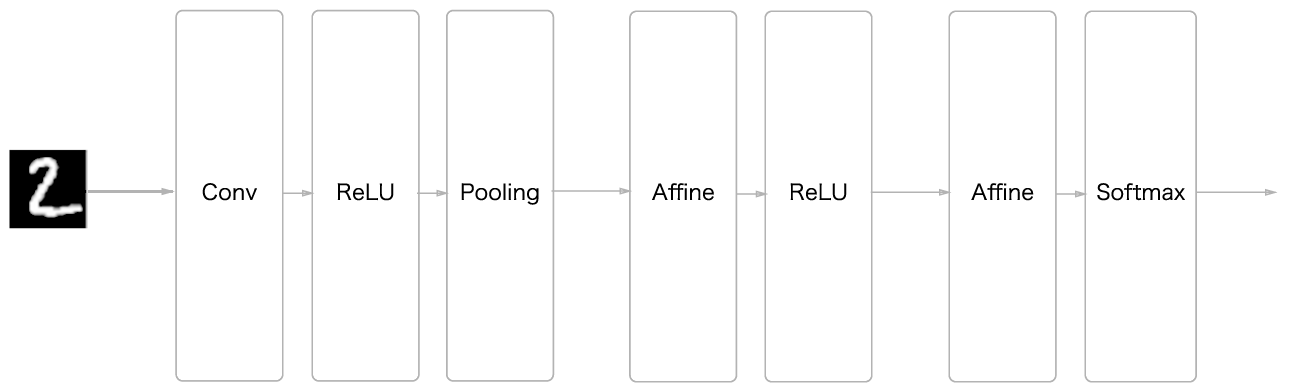

CNN으로 이뤄진 네트워크의 예

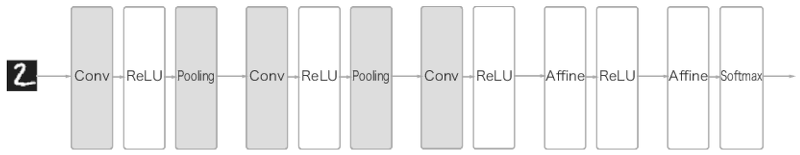

- CNN에서는 새로운 '합성곱 계층'과 '풀링 계층'이 추가됨.
- CNNN 계층은 'Conv-ReLU-(Pooling)' 흐름으로 연결.(풀링 계층은 생략하기도 함.
- 출력에 가까운 층에서는 지금까지의 'Affine-ReLU' 구성을 사용할 수 있음.
- 마지막 출력 계층에서는 'Affine-Softmax'조합을 그대로 사용함.

## 합성곱 계층
- CNN 에서는 패딩, 스트라이드 등 CNN 고유의 용어가 등장함.
- 각 계층 사이에는 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다름.

### 완전연결 계층의 문제점
- '데이터의 형상'이 무시됨. 입력데이터가 이미지일 경우, 3차원 데이터를 1차원 데이터로 평탄화 해줘야함. 그러나 이 3차원 형상에는 많은 공간적 정보가 담겨있음. 예를 들어 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리는 별 연관이 없는 등, 3차원 속에서 패턴이 숨어 있음.
- 합성곱 계층은 형상을 유지함. 3차원 데이터로 입력 바등면 3차원 데이터로 전달함.
- CNN에서는 합성곱 계층의 입출력 데이터를 특징맵이라고도함.
- 합성곱 계층의 입력 데이터를 입력 특징 맵, 출력 데이터를 출력 특징 맵이라고 함.

### 합성곱 연산
합성곱 계층에서의 합성곱 연산을 처리함. 합성곱 연산은 이미지 처리에서 말하는 필터 연산에 해당함.

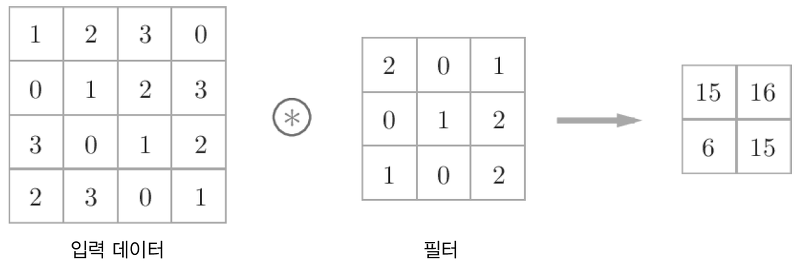

- 입력 데이터에 필터 적용
- 합성곱 연산은 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용함.
- 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구함.(이 계산을 단일 곱셈 누산이라고 함.).
- 그 결과를 출력에 해당 장소에 저장함.
- 이 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성됨.

<br/>
[합성곱 연산의 계산순서]

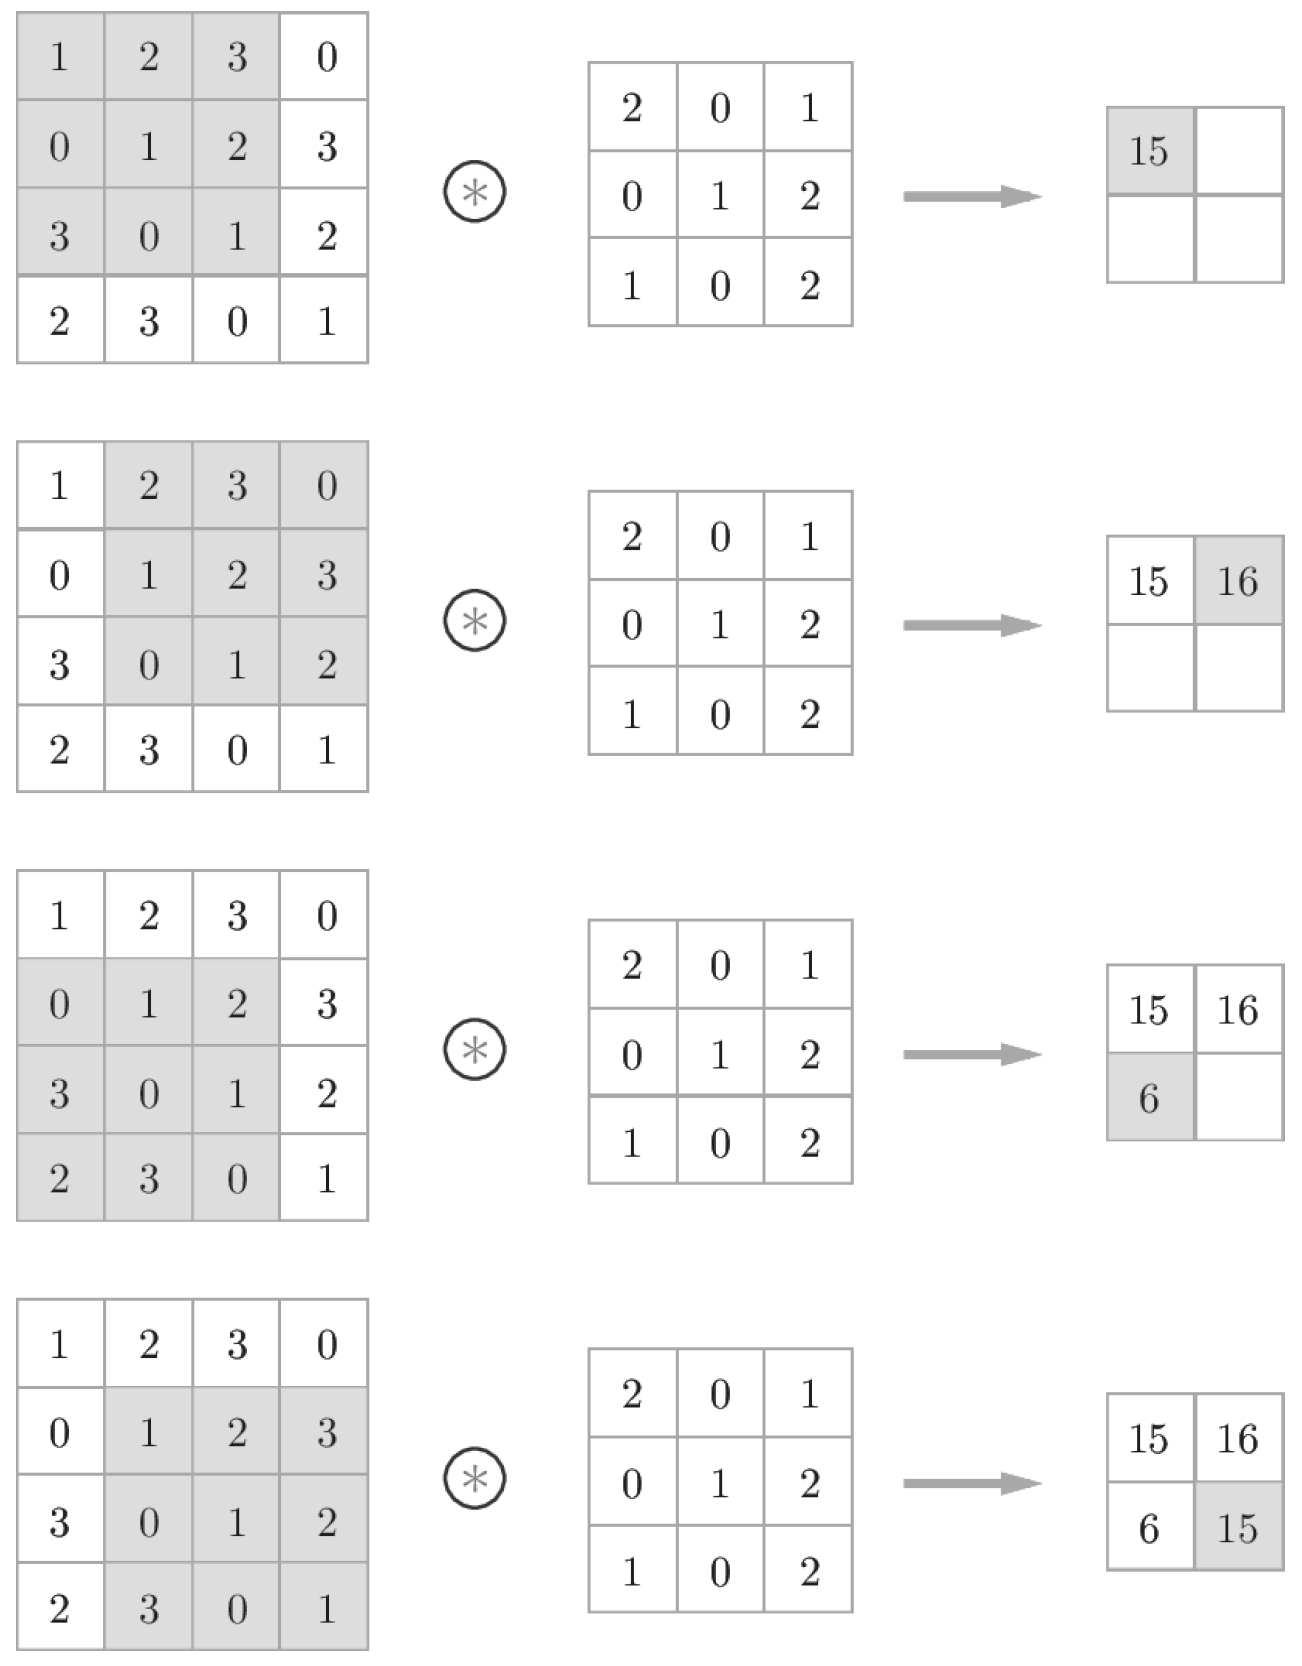

완전연결 신경망에는 가중치 매개변수와 편향이 존재하는데, CNN에서는 필터의 매개변수가 '가중치'에 해당함. 또한 편향도 존재함.
<br/>
[합성곱 연산의 편향: 필터를 적용한 원소에 고정값(편향)을 더한다.]

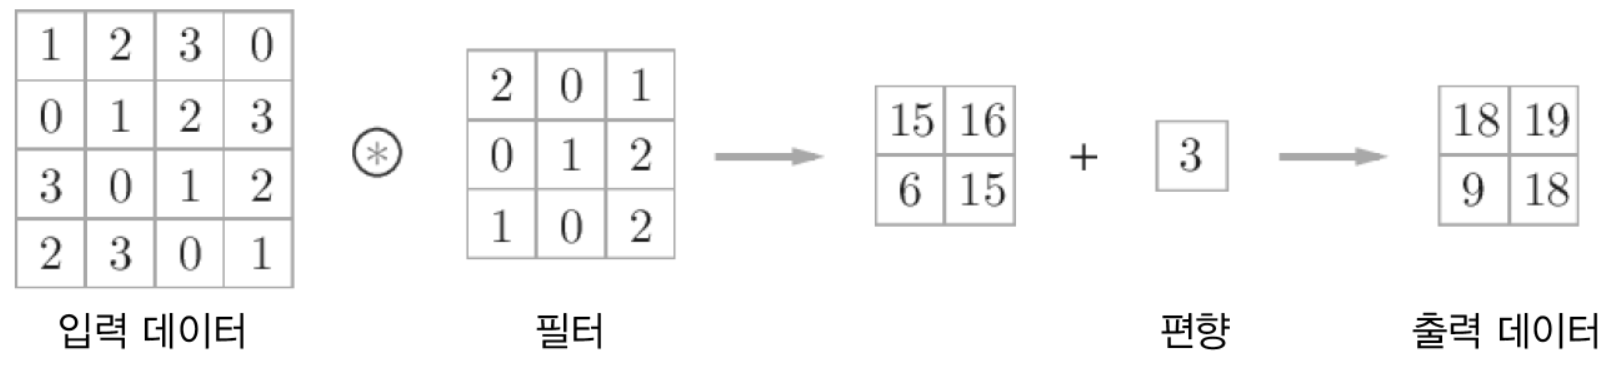

- 편향은 필터에 적용한 후의 데이터에 더해짐.
- 편향은 항상 하나만 존재함. 그 하나의 값을 필터를 적용한 모든 원소에 더함.

### 패딩
합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값(0)으로 채우는 것.

- 입력 데이터에 폭이 1인 패딩을 적용한 모습
[합성곱 연산의 패딩 처리: 입력 데이터 주위에 0을 채운다(패딩은 점선으로 표시했으며 그 안의 값 '0'은 생략함.)]

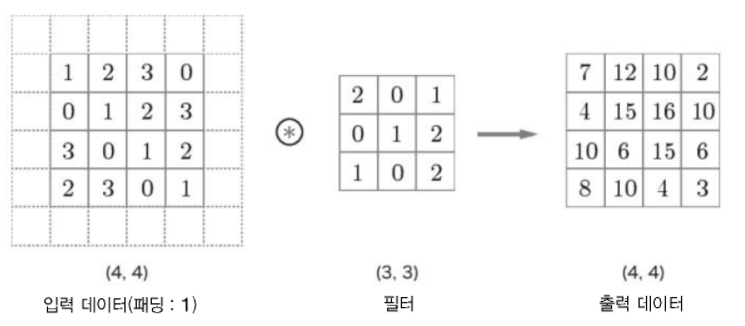

- 패딩은 주로 출력 크기를 조정학 목적으로 사용함.
- 예를 들어 (4,4) 입력 데이터에 (3,3) 필터를 적용하면 출력은 (2,2)가 되어, 입력보다 2만큼 줄어듦. 아는 합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서는 문제가 될 수 있음. 합성곱 연산을 거칠 때마다 크기가 작아지면 어느 시점에서는 출력 크기가 1이 되어버림. 더이상 합성곱 연산을 적용할 수 없음.
- 이러한 사태를 막기 위해 패딩을 적용함. 위의 예제에서는 패딩의 폭을 1로 지정해 (4,4) 입력에 대한 출력이 같은 크기인 (4,4)로 유지됨.
- 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있음.

### 스트라이드
필터를 적용하는 위치의 간격

[스트라이드가 2인 합성곱 연산]

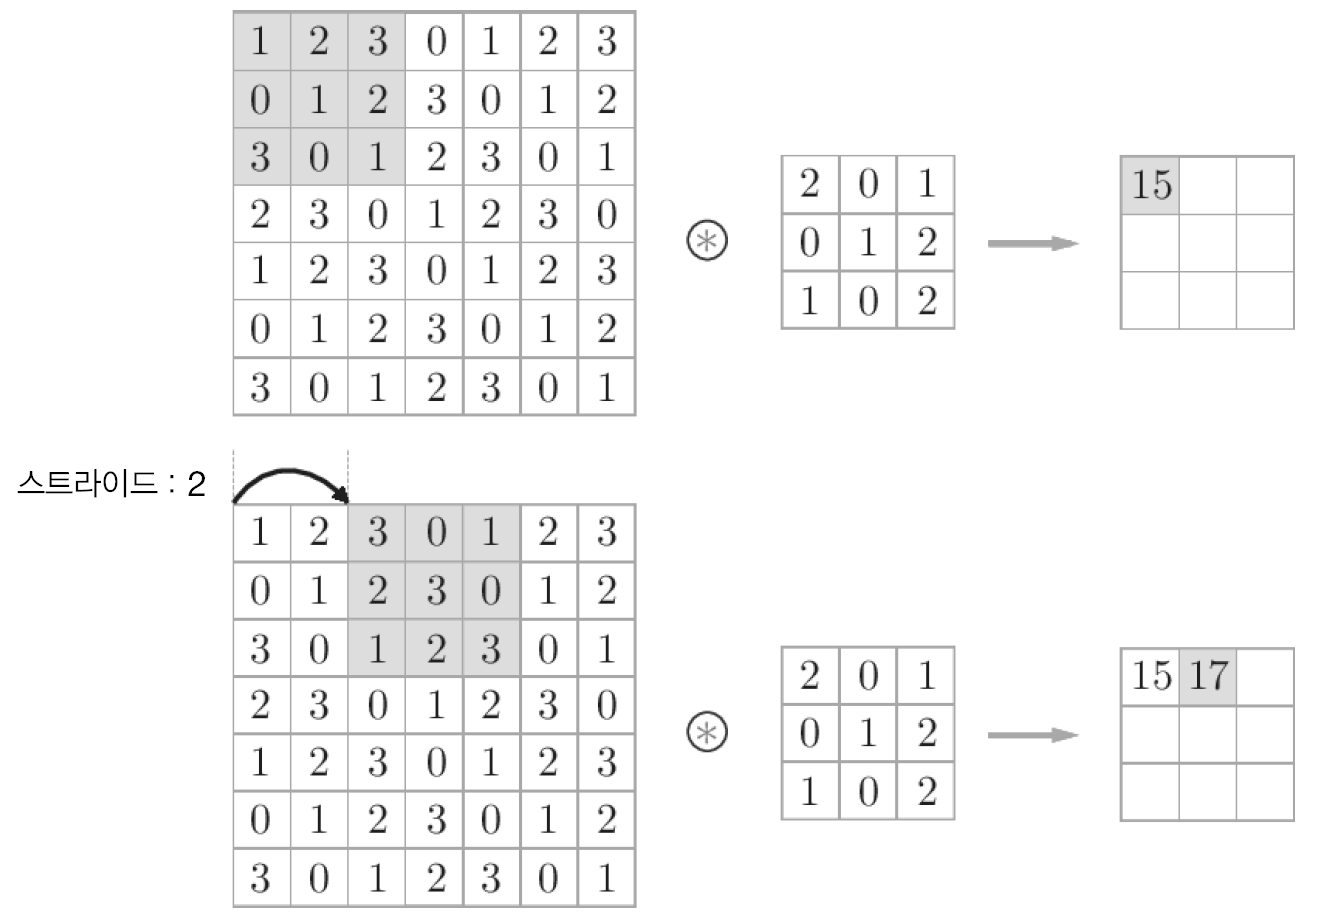

- 스트라이드를 키우면 크기는 작아짐. 
- 패딩, 스트라이드, 출력 크기 계산 식

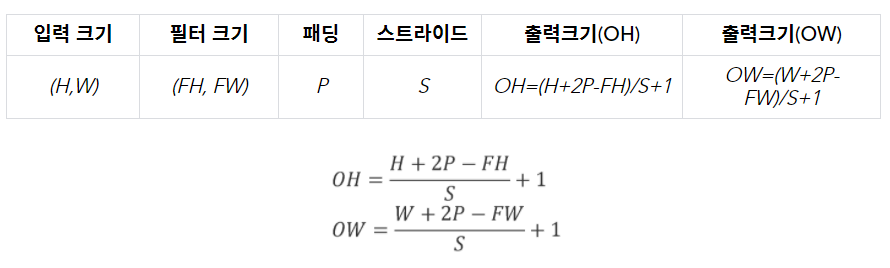


- 값을 대입했을 때 정수로 나눠떨어져야 함.
- 값이 딱 나눠떨어지지 않을 때는 가장 가까운 정수로 반올림 하는 등의 에러를 내지않고 진행하도록 구현함.

### 3차원 데이터의 합성곱 연산

[3차원 데이터 합성곱 연산의 예]

채널쪽으로 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻음.

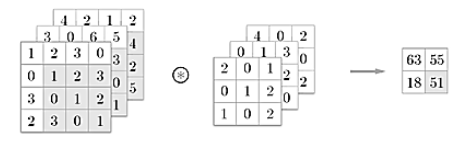

[3차원 데이터 합성곱 연산의 계산 순서]

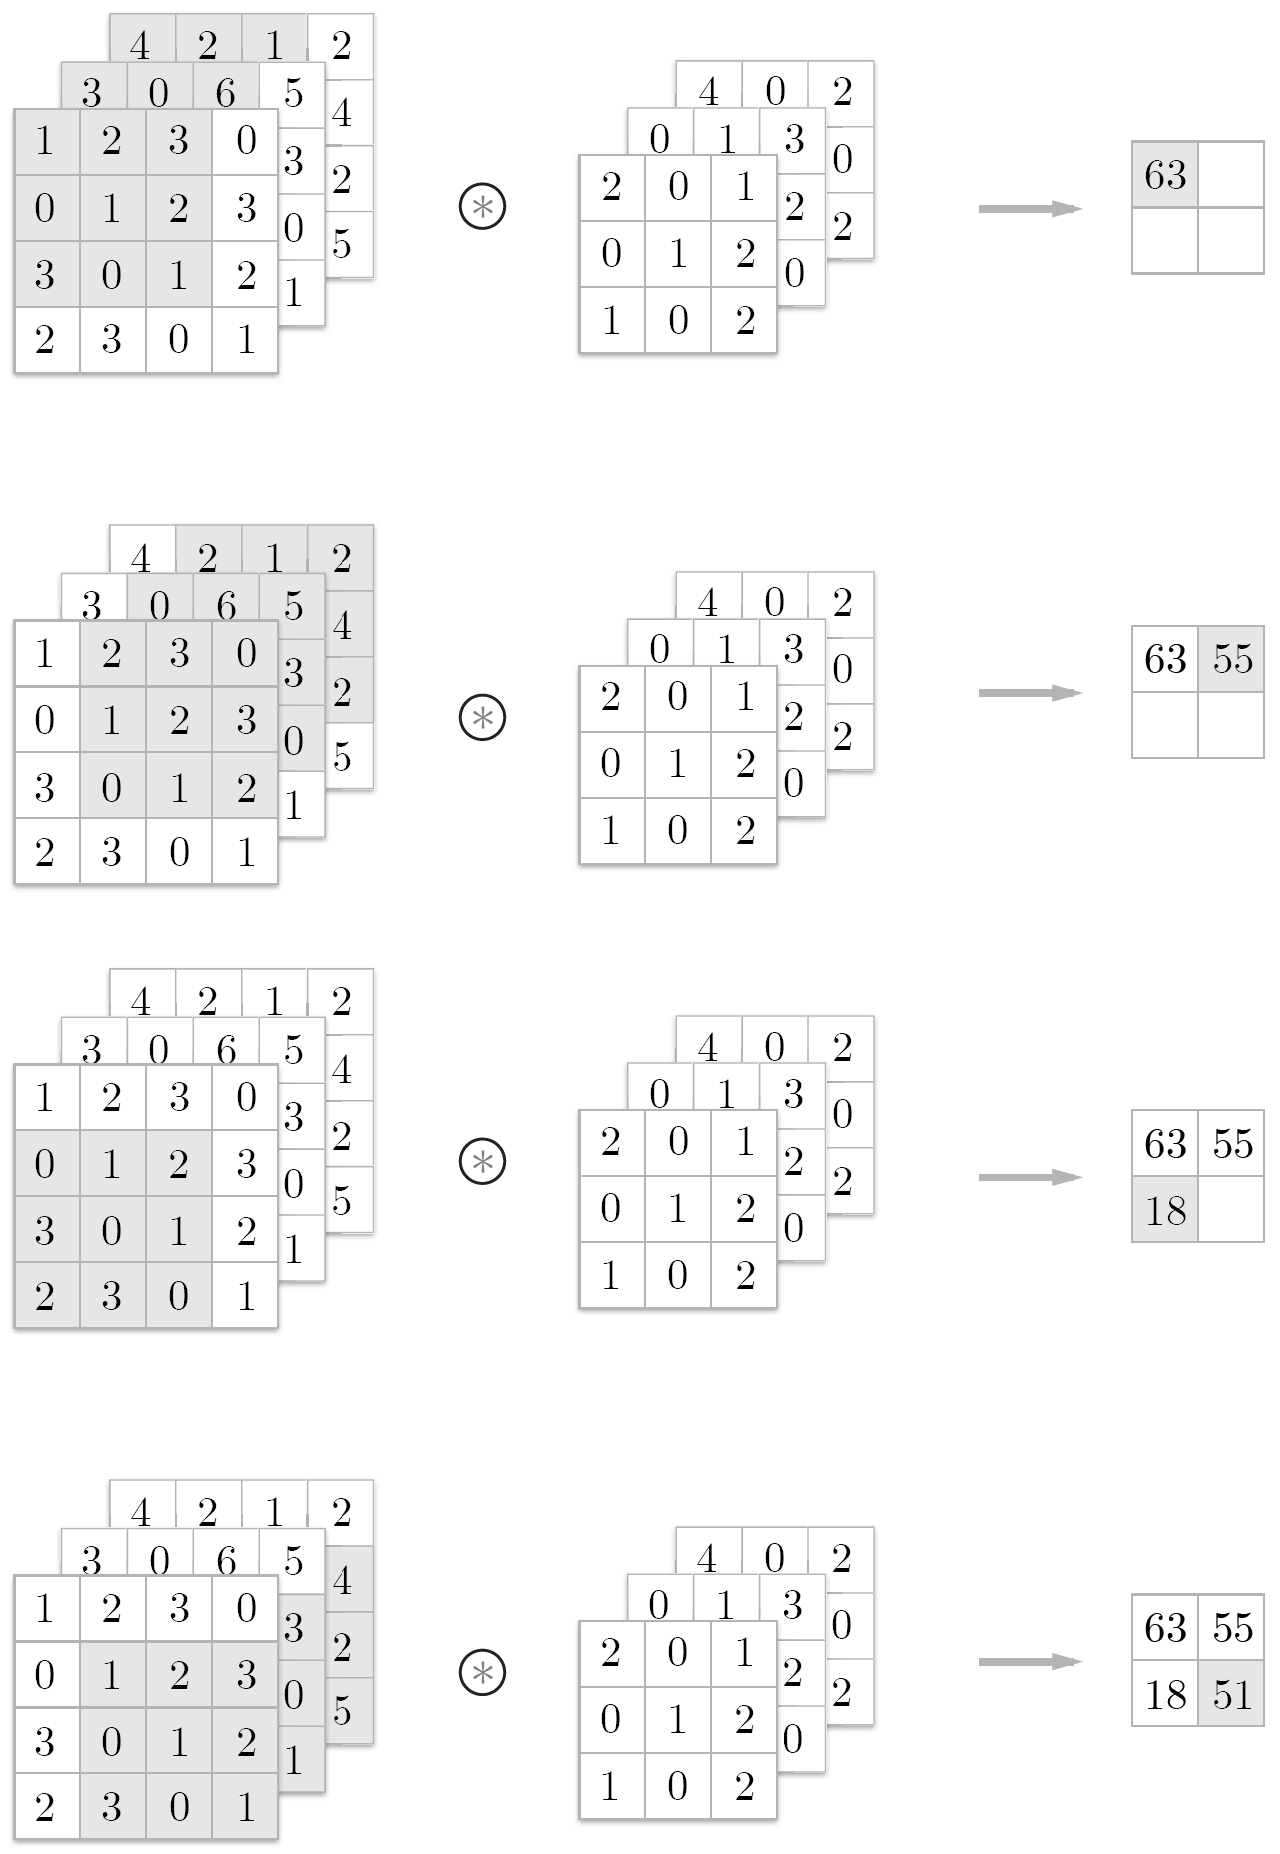

- 입력 데이터의 채널 수와 필터의 채널 수가 같아야함.

### 블록으로 생각하기
- 3차원의 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉬움.
- 3차원 데이터를 다차원 배열로 나타낼 때는 (채널, 높이, 너비) 순으로 씀.
- 채널수 C, 높이 H, 너비 W일 때 데이터의 형상은 (C, H, W)로 씀.

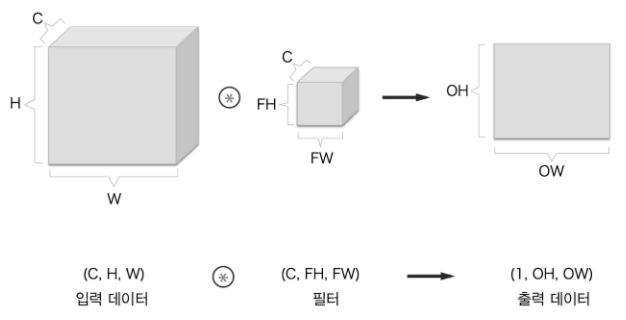


- 합성곱 연산의 출력으로 다수의 채널을 내보내려면 필터(가중치)를 다수를 사용함.

[여러 필터를 사용한 합성곱 연산의 예]

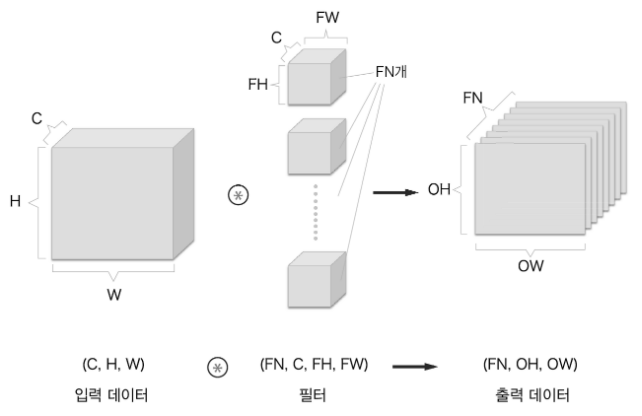

- 위 그림과 같이 필터를 FN개 적용하면 출력맵도 FN개 생성됨.
- 그 FN개의 맵을 모으면 형상이 (FN, OH, OW)인 불록이 오나성됨. 이 완성된 블록을 다음 계층으로 넘기는 것이 CNN의 처리 흐름임.
- 합성곱 연산에서는 필터의 수도 고려해야함. 그런 이유로 필터의 가중치 데이터는 4차원 데이터이며, (출력 채널 수 , 입력 채널 수, 높이, 너비)순으로 씀.
- 합성곱 연산에도 편향이 쓰임.

[합성곱 연산의 처리 흐름(편향 추가)]

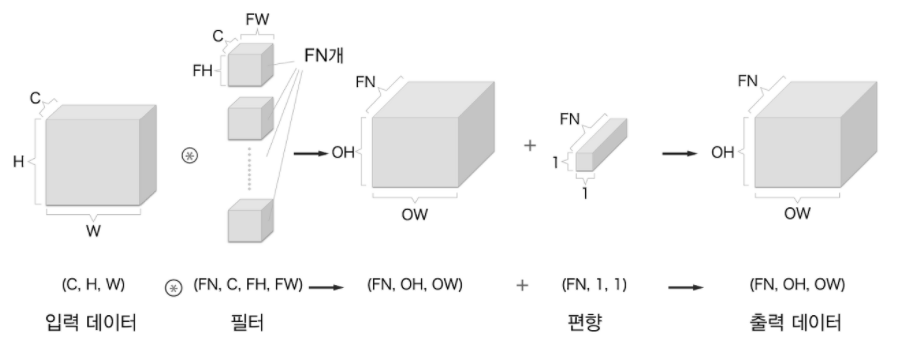

- 편향은 채널 하나에 값 하나씩으로 구성됨. 위 그림에서는 편향의 형상은 (FN, 1, 1)이고, 필터의 출력 결과의 형상은 (FN, OH, OW)임. 이 두 블록을 더하면 편향의 각 값이 필터의 출력인 (FN, OH, OW) 블록의 대응 채널의 원소 모두에 더해짐.

### 배치 처리
- 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장함. 
- 구체적으로는 데이터를 (데이터 수, 채널 수, 높이, 너비) 순으로 저장함. 
- 데이터가 N개일 때의 배치 처리 예시는 아래와 같음.

[합성곱 연산의 처리 흐름(배치 처리)]

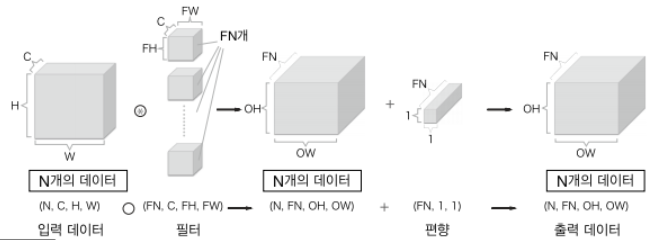

- 각 데이터의 선두에 배치용 차원을 추가함.
- 데이터는 4차원 형상을 가진채 각 계층을 타고 흐름.
- 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄짐. 즉, N회 분의 처리를 한 번에 수행함.

## 풀링 계층
세로·가로 방향의 공간을 줄이는 연산

[최대 풀링의 처리 순서]

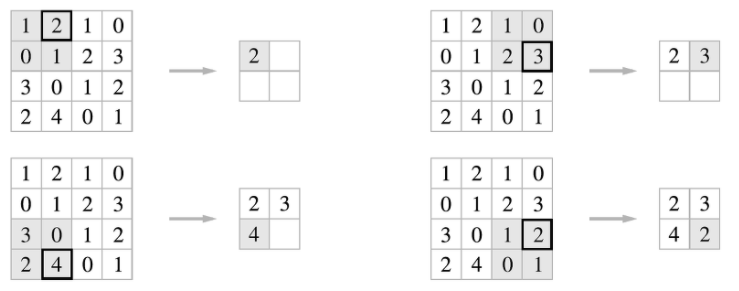

- 위 그림은 최대풀링을 스트라이드 2로 처리하는 순서임.
- 최대 풀링은 최댓값을 구하는 연산으로, '2x2'는 대상 영역의 크기를 뜻함. 즉, 2x2 최대 풀링은 위 그림과 같이 2x2 크기의 영역에서 가장 큰 원소 하나를 꺼냄.
- 스트라이드는 2로 설정을 했으므로 윈도우가 원소 2칸 간격으로 이동함. 출링의 윈도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통임. 예를 들어 윈도우가 3x3이면 스트라이드는 3으로, 윈도우가 4x4이면 스트라이드를 4로 설정함.

풀링은 최대 풀링 외에도 평균 풀링등이 있음. 최대 풀링은 대상 영역에서 최댓값을 취하는 연산인 반면, 평균 풀링은 대상 영역의 평균을 계산함. 이미지 인식 분야에서는 주로 최대 풀링을 사용함. 

### 풀링 계층의 특징
1. 학습해야 할 매개변수가 없다.
  - 풀링 계층은 합성곱 계층과 달리 학습해야 할 매개변수가 없습니다. 풀링은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이므로 특별히 학습할 것이 없습니다.
2. 채널 수가 변하지 않는다.
  - 풀리 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 내보냅니다. 밑 그림처럼 채널마다 독립적으로 계산하기 때문입니다.

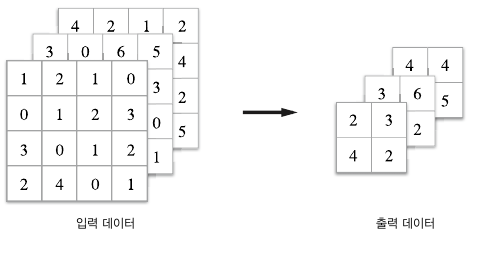

3. 입력의 변화에 영향을 적게 받는다.(강건하다)
  - 입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않습니다. 예를 들어 밑 그림은 입력 데이터의 차이(데이터가 오른쪽으로 1칸씩 이동)를 풀링이 흡수해 사라지게 하는 모습을 보여줍니다.

[입력 데이터가 가로로 1원소만큼 어긋나도 출력은 같다(데이터에 따라서는 다를 수도 있다)]

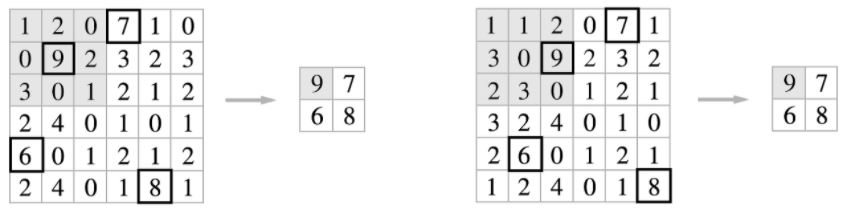

## 합성곱/풀링 계층 구현하기

### 4차원 배열

In [1]:
import numpy as np
x = np.random.rand(10, 1, 28, 28)   # 무작위로 데이터 생성
x.shape

(10, 1, 28, 28)

In [2]:
print(x[0].shape) # 첫 번째 데이터
print(x[1].shape) # 두 번째 데이터

(1, 28, 28)
(1, 28, 28)


In [3]:
# 첫번째 데이터의 첫 채널의 공간 데이터에 접근
x[0, 0]

array([[3.47785132e-02, 1.99444807e-01, 6.05832434e-01, 9.13490927e-01,
        9.16080544e-01, 2.45727741e-01, 2.85587321e-01, 5.37078663e-01,
        4.10387740e-01, 7.99505485e-01, 2.26690264e-01, 7.90424982e-02,
        5.28664676e-01, 1.21640579e-01, 4.81459043e-01, 1.43154597e-01,
        9.71204445e-01, 3.66546928e-01, 4.44702150e-01, 4.24100137e-01,
        2.15152497e-01, 3.48107418e-01, 5.43698993e-01, 5.78648386e-01,
        4.30000565e-01, 1.09878618e-01, 7.16653721e-01, 6.52732719e-01],
       [6.57477874e-01, 7.50582647e-01, 9.75824013e-01, 7.33999346e-01,
        7.19205086e-01, 5.43192638e-01, 4.00438868e-01, 4.26537340e-01,
        1.22987788e-01, 3.79181756e-01, 3.69586434e-02, 9.17400486e-01,
        4.42729196e-01, 7.83534990e-01, 5.88854148e-01, 5.05409582e-01,
        8.57706499e-01, 9.01927129e-01, 3.19237713e-01, 2.98214224e-01,
        3.77659275e-01, 7.94541979e-01, 4.51699123e-01, 1.88722436e-01,
        7.31939336e-01, 2.13622547e-01, 6.47441302e-01, 8.12622

### im2col로 데이터 전개하기
- 성능이 떨어지는 for문 대신 im2col 함수 사용
- im2col은 입력 데이터를 필터링하기 좋게 전개하는 함수임.
- 밑 그림과 같이 3차원 입력 데이터 im2col을 적용하면 2차원 행렬로 바뀜.(정확히는 배치 안의 데이터 수까지 포함한 4차원 데이터를 2차원으로 변환함.)

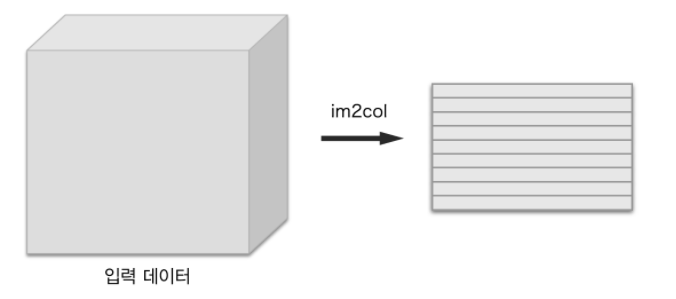

- im2col은 필터링하기 좋게 입력 데이터를 전개함.
- 밑 그림과 같이 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄러 늘어놓음. 이 전개를 필터로 적용하는 모든 영역에서 수행하는 것이 im2col임.

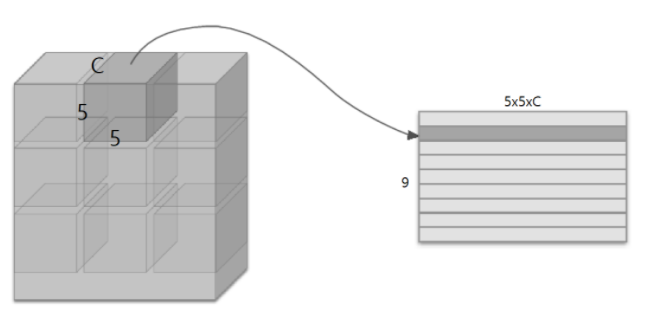

- 실제 상황에서는 필터 적용 영역이 겹치는 경우가 대부분임.
- 필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아짐.
- 그래서 im2col을 사용해 구현하면 메모리를 더 많이 소비함. 하지만 근 행렬을 묶어서 계산하는 데 탁월함.
- 예를 들어 행렬 계산 라이브러리 등은 행렬 계산에 고도로 최적화되어 큰 행렬의 곱셈을 빠르게 계산할 수 있음.
- im2col로 입력 데이터를 전개한 다음에는 합성곱 계층의 필터를 1열로 전개하고, 두 행렬의 곱을 계산하면 됨. 이는 완전연결 계층의 Affine 계층에서 한 것과 거의 같음.

[합성곱 연산의 필터 처리 상세 과정: 필터를 세로로 1열로 전개하고, im2col이 전개한 데이터와 행렬 곱을 계산합니다. 마지막으로 출력 데이터를 변형(reshape)합니다.]

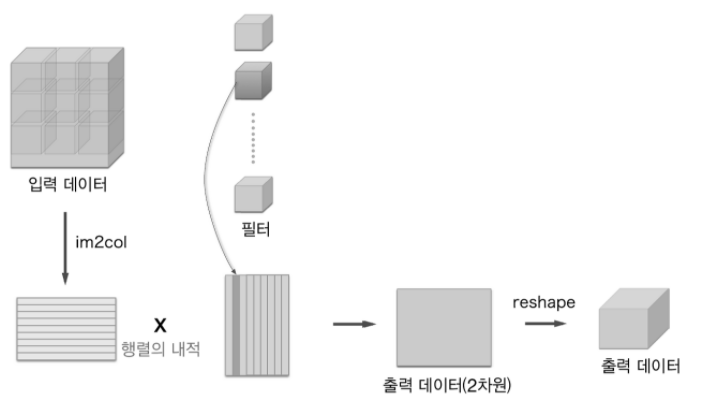

- im2col 방식으로 출력한 결과는 2차원 행렬임.
- CNN은 데이터를 4차원 배열로 저장하므로 2차원인 출력 데이터를 4차원으로 변형함.

### 합성곱 계층 구현하기

im2col(input_data, filter_h, filter_w, stride = 2, pad = 0)

- input_data: (데이터 수, 채널 수, 높이, 너비)의 4차원 배열로 이뤄진 입력 데이터
- filter_h: 필터의 높이
- filter_w: 필터의 너비
- stride: 스트라이드
- pad: 패딩

imwcol은 필터 크기, 스트라이드, 패딩을 고려하여 입력 데이터를 2차원 배열로 전개함.

In [4]:
%cd /content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝

/content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝


In [5]:
import sys, os
sys.path.append(os.pardir)
from common_util import im2col

x1 = np.random.rand(1, 3, 7, 7)     # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride = 1, pad = 0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)    # 데이터 10개
col2 = im2col(x2, 5, 5, stride = 1, pad = 0)
print(col2.shape)

(9, 75)
(90, 75)


In [6]:
# im2col을 사용하여 합성곱 계층 구현
class Convolution:
  def __init__(self, W, b, stride = 1, pad = 0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = x.shape
    out_h = int(1 + (h + 2 * self.pad - FH) / self.stride)
    out_w = int(1 + (W + 2 * self.pad - FW) / self.stride)

    col = im2col(x, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T    # 필터 전개
    out = np.dot(col, col_W) + self.b

    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    return out

- forward 구현의 마지막에서는 풀력 데이터를 적절한 형상으로 바꿔줌.
- 이때 넘파이의 transpose 함수를 사용하는데, 이는 다차원 배열의 축 순서를 바꿔주는 함수임.

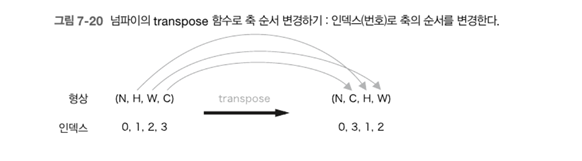

### 풀링 계층 구현하기
- 풀링 계층 구현도 합성곱 계층과 마찬가지로 im2col을 사용해 입력 데이터를 전개함.
- 단, 풀링의 경우엔 채널 쪽이 독립적이라는 점이 합성곱 계층 떄와 다름.
- 구체적으로는 풀링 적용 영역을 채널마다 독립적으로 전개함.

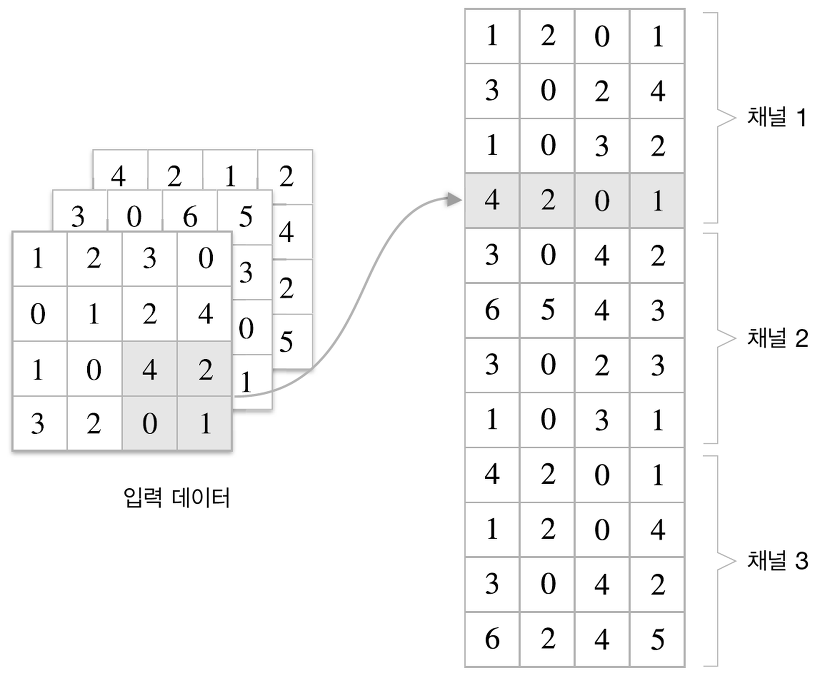

[풀링 계층 구현의 흐름: 풀링 적용 영역에서 가장 큰 원소는 회색으로 표시]

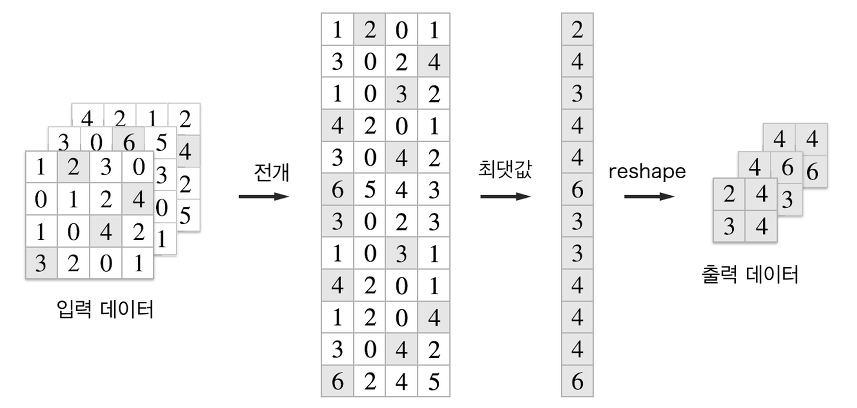

In [7]:
# 풀링 계층의 forward 처리 흐름 구현
class Pooling:
  def __init__(self, pool_h, pool_w, stride = 1, pad = 0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)

    # 전개(1)
    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h * self.pool_w)

    # 최댓값(2)
    out = np.max(col, axis = 1)

    # 성형(3)
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    return out

풀링 계층 구현은 다음의 세 단계로 진행함.

1. 입력 데이터를 전개한다.
2. 행별 최댓값을 구한다.
3. 적절한 모양으로 성형한다.

## CNN 구현하기

[딘순한 CNN의 네트워크 구성]
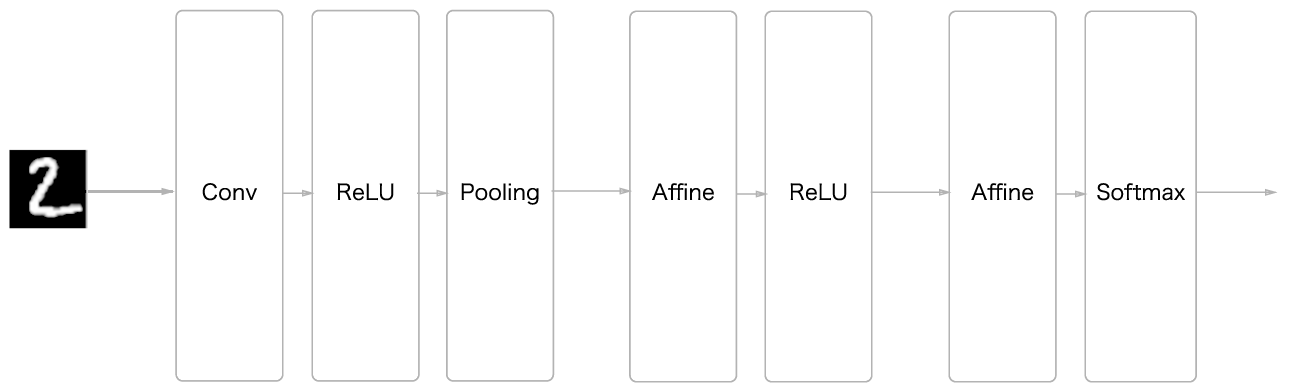

이 그림의 CNN 네트워크는 'Convolution-ReLU-Poolig-Affine-ReLU-Affine-Softmax' 순으로 흐름.

#### SimpoleConvNet 구현

초기화 때 받는 인수
* input_dim: 입력 데이터(채널 수, 높이, 너비)의 차원
* conv_param: 합성곱 계층으 ㅣ하이퍼 파라미터(딕셔너리), 딕셔너리의 키는 다음과 같다.
  - filter_num: 필터 수
  - filter_size: 필터 크기
  - stride: 스트라이드
  - pad: 패딩
* hidden_size: 은닉층(완전 연결)의 뉴런 수
* output_size: 출력층(완전 연결)의 뉴런 수
* weight_init_std: 초기화 때의 가중치 표준푠차

In [8]:
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from collections import OrderedDict
from common_layers import *
from common_gradient import numerical_gradient

class SimpleConvNet:
  def __init(self, input_dim = (1, 28, 28),
             conv_param = {'filter_num':30, 'filter_size':5,
                           'pad':0, 'stride':1}, hidden_size = 100, output_size = 10, weight_init_std = 0.01):
    filter_num = conv_param['filter_num']
    filter_size = conv_param['filter_size']
    filter_pad = conv_param['pad']
    filter_stride = conv_param['stride']
    input_size = input_dim[1]
    conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
    pool_output_size = int(filer_num * (conv_output_size/2) * (conv_output_size / 2))

    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
    self.params['b1'] = np.zeros(filter_num)
    self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
    self.params['b2'] = np.zeros(hidden_size)
    self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b3'] = np.zeros(output_size)

    self.layers = OrderedDict()
    self.layers['Conv1'] = Convolution(self.params['W1'],
                                       self.params['b1'],
                                       self.params['stride'],
                                       self.params['pad'])
    self.layers['Relu1'] = Relu()
    self.layers['Pool1'] = Pooling(pool_h = 2, pool_2 = 2, stride = 2)
    self.layers['Affine1'] = Affine(self.params['W2'],
                                    self.params['b2'])
    self.layers['Relu2'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W3'],
                                    self.params['b3'])
    self.last_layer = SoftmaxWithLoss()

  def predict(self, x):
    for layer in self.layers.values():
       x = layer.forward(x)
       return x

  def loss(self, x, t):
    y = self.predict(x)
    return self.last_layer.forward(y, t)

  def gradient(self, x, t):
    # 순전파
    self.loss(x, t)

    # 역전파
    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    # 결과 저장
    grads = {}
    grads['W1'] = self.layers['Conv1'].dW
    grads['b1'] = self.layers['Conv1'].db
    grads['W2'] = self.layers['Affine1'].dW
    grads['b2'] = self.layers['Affine1'].db
    grads['W3'] = self.layers['Affine2'].dW
    grads['b3'] = self.layers['Affine2'].db

    return grads

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
train loss:0.006149953247268165
train loss:0.0015876366104765338
train loss:0.0010682069268485436
train loss:0.008203958576411575
train loss:0.00280353877705135
train loss:0.0065335713993148695
train loss:0.003378729897558727
train loss:0.0013367257735981742
train loss:0.0020262356602468987
train loss:0.010175542845464704
train loss:0.015582816569759232
train loss:0.0007961469274929077
train loss:0.00024911054236361374
train loss:0.005889122602957856
train loss:0.001614782589531283
train loss:0.0024691616691870093
train loss:0.005252417890360461
train loss:0.003140982833796489
train loss:0.0014043452345292335
train loss:0.0010878414326299215
train loss:0.027208963958064235
train loss:0.001020559255350992
train loss:0.0022277845550227964
train loss:0.005612251289416685
train loss:0.006901944565976797
train loss:0.007896846027226043
train loss:0.00466038671531031
train loss:0.0037958231279922898
train loss:0.006156348962447371
train loss:0.003208934441

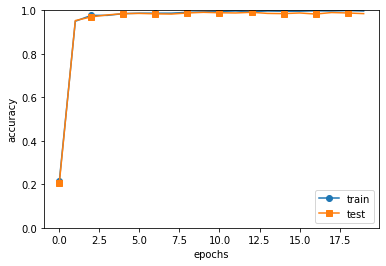

In [9]:
# SimpleConvNet으로 mnist 학습
# 약 1시간 20분 소요

import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from simple_convnet import SimpleConvNet
from common_trainer import Trainer


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()


network.save_params("params.pkl")
print("Saved Network Parameters!")


markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## CNN 시각화 하기

### 1번째 층의 가중치 시각화하기

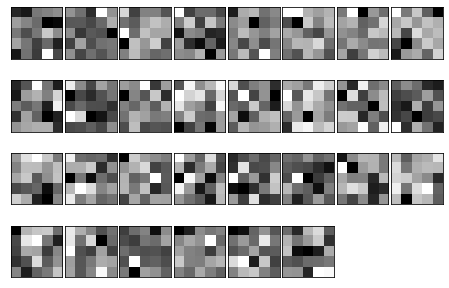

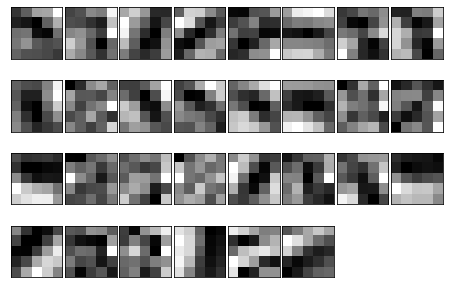

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
filter_show(network.params['W1'])


network.load_params("params.pkl")
filter_show(network.params['W1'])

- 학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도에 규칙성이 없음.
- 학습을 마친 필터는 규칙성 있는 이미지가 되었음. 흰색에서 검은색으로 점차 변화하는 필터와 덩어리(블롭blob)가 진 필터 등, 규칙을 띄는 필터로 바뀜.

<br/>
[가로 에지와 세로 에지에 반응하는 필터: 출력 이미지 1은 세로 에지에 흰 픽셀이 나타나고, 출력 이지미 2는 가로 에지에 흰 픽셀이 많이 나온다.]

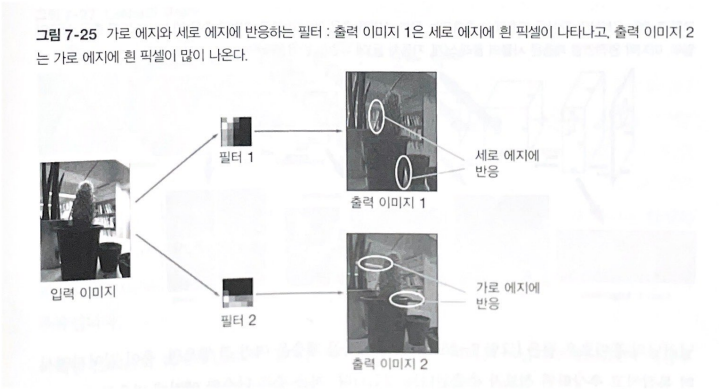

### 층 깊이에 따른 추출 정보 변화

- 계층이 깊어질수록 추출되는 정보(정화히는 강하게 반응하는 뉴런)는 더 추상화 된다는 것을 알 수 잇음.
- 아래 그림은 일반 사물 인식을 수행한 8층의 CNNN임. 이 네트워크 구조는 AlexNet이라 하는데, 합성곱 계층과 풀링 계층을 여러 겹 쌓고, 마지막으로 완전연결 계층을 거쳐 출력하는 과정임. 블록으로 나타낸 것은 중간 데이터이며, 그 중간 데이터에 합성곱 연산을 연속에서 적용함.

<br/>
[CNN의 합성곱 계층에서 추출되는 정보. 1번쨰 층은 에지와 블롭, 3번째 층은 텍스처, 5번째 층은 사물의 일부, 마지막 완전연결 계층은 사물의 클래스에 뉴런이 반응한다.]

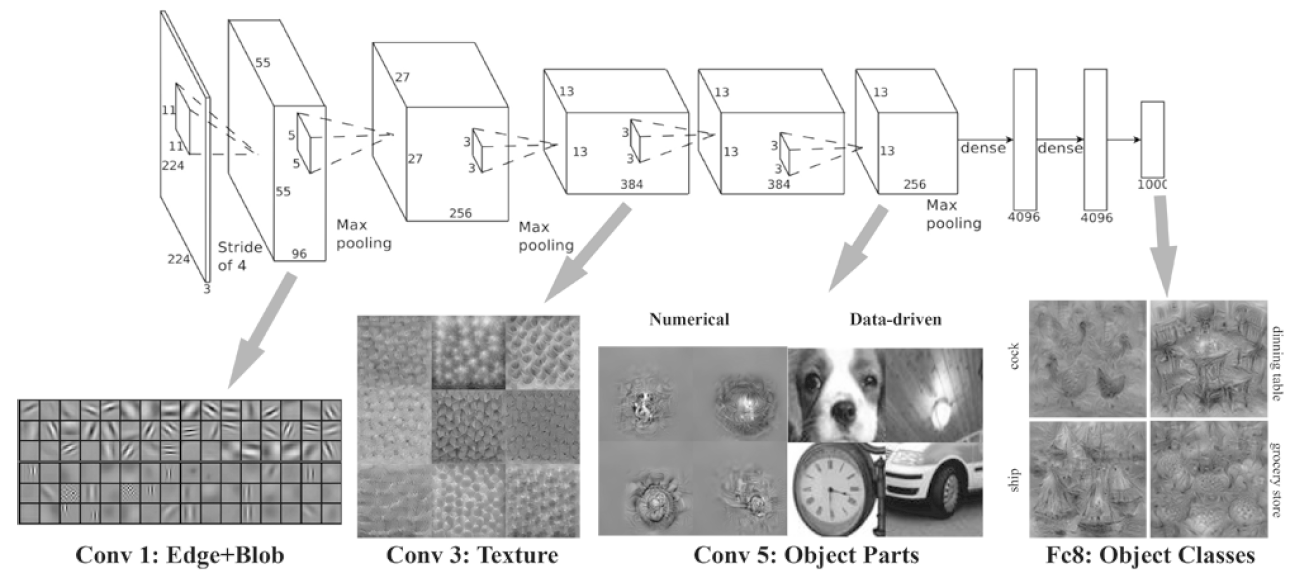

딥러닝의 흥미로운 저은 합성곱 계층을 여러 겹 쌓으면, 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출됨. 처음 층은 단순한 에지에 반응하고, 이어서 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화함. 즉, 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급' 정보로 변화해감. 다시 말하면 사물의 '의미'를 이해하도록 변화함.

## 대표적인 CNN
1. LeNet
2. AlexNet

### LeNet
- 손글씨 숫자를 인식하는 네트워크
- 합성곱 계층과 풀링 계층('원소를 줄이기'만 하는 서브샘플링 계층)을 반복하고, 마지막으로 완전연결 계층을 거치면서 결과를 출력함.

<br/>
[LeNet의 구성]

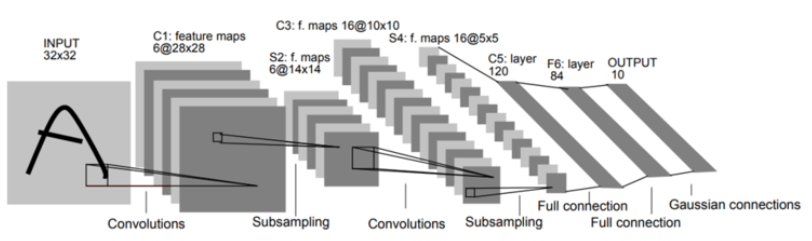

#### LeNet롸 '현재의 CNN' 차이점
1. 활성화 함수
  - LeNet은 시그모이드 함수를 사용하는데 반해, 현재는 주로 ReLU를 사용함.
2. LeNet은 서브샘플링을 하여 중간 데이터의 크기를 줄이지만 현재는 최대 풀링이 주류임.

### AlexNet

<br/>
[AlexNet의 구성]

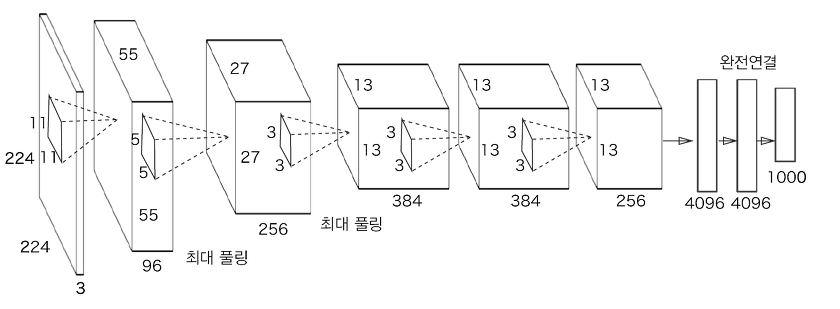

- AlexNet은 합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거쳐 결과를 출력함.
- LeNet에서 큰 구조는 바뀌지 않지만 AlexNet에서는 다음과 같이 변화를 줌.
1. 활성화 함수로 ReLU를 이용한다.
2. LRN(local Response Normalization)이라는 국소적 정규화를 실시하는 계층을 이용한다.
3. 드롭아웃을 사용한다.

- LeNet과 AlexNet에는 큰 차이가 엇ㅂ지만 환경과 컴퓨터 기술의 발전이 있었음. 대량의 데이터를 누구나 얻을 수 있게 되었고, 병렬 계산에 특화된 GPU가 보급되면서 대량의 연산을 고속으로 수행할 수 있게 되었음.

## 정리
- CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
- 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
- CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있따.
- 대표적인 CNN에는 LeNet과 AlexNet이 있다.
- 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여했다.